# Exploratory Data Analysis for Revenue Predicting Service - *by Jan Korinek*

### Deliverable goals


> (1) Assimilate the business scenario and articulate testable hypotheses.

#### Answer:

***The main goal is to create service capable to predict company revenue for following month. Projection has to be able to estimate separated revenues for predefined countries. Predictive performance has to achieve sufficient accuracy to have positive impacet on manager decision making.***

***Revenue estimates will be based on charging for combination of services to which is each customer subscribed.***

***From business perspective is expected to increase company revenue by well projected budged and staffing allocation. This is dependent on executive decisions based on more accurate predictions. Therefore can be defined business metric as function of revenue generated by more accurate predictions.***

#### Null Hypothesis:
***Revenue of the company is not affected by increase of the prediction accuracy.***

***In order to reject a null hypothesis, it may be proceed to testing.***

> (2) State the ideal data to address the business opportunity and clarify the rationale for needing specific data.


#### Answer:

***Based on defined business scenario, obtained customer data should be ideally at transaction level and has to be time-dependent in order to create supervised prediction model. Data should cover customer payment history, country of subscription, profile information and names of subscribed services.***

> (3.) Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

In [1]:
# Load and extract data from raw json into dictionary of dataframes for top 10 countries by revenue
%run cslib.py

# Show selected df
print(ts_all['all'])

# Update df about 'year' column
for key, df in ts_all.items():
    df['year'] = df.year_month.str[:4]

...fetching data
... loading ts data from files
load time: 0:00:00
all (607, 7)
eire (607, 7)
france (607, 7)
germany (607, 7)
hong_kong (426, 7)
netherlands (607, 7)
norway (577, 7)
portugal (607, 7)
singapore (456, 7)
spain (607, 7)
united_kingdom (607, 7)

           date  purchases  unique_invoices  unique_streams  total_views  \
0    2017-11-01          0                0               0            0   
1    2017-11-02          0                0               0            0   
2    2017-11-03          0                0               0            0   
3    2017-11-04          0                0               0            0   
4    2017-11-05          0                0               0            0   
..          ...        ...              ...             ...          ...   
602  2019-06-26       1358               67             999         6420   
603  2019-06-27       1620               80             944         9435   
604  2019-06-28       1027               70             

> (4.) Investigate the relationship between the relevant data, the target and the business metric.

### Investigation:

#### Libraries Import and Fonts setup

In [2]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

#### Missing Values Summary and Visualization

all Missing Value Summary:
----------------------
date                 0
purchases          139
unique_invoices    139
unique_streams     139
total_views        139
year_month           0
revenue            139
year                 0
dtype: int64 

eire Missing Value Summary:
----------------------
date                 0
purchases          326
unique_invoices    326
unique_streams     326
total_views        328
year_month           0
revenue            326
year                 0
dtype: int64 

france Missing Value Summary:
----------------------
date                 0
purchases          339
unique_invoices    339
unique_streams     339
total_views        341
year_month           0
revenue            339
year                 0
dtype: int64 

germany Missing Value Summary:
----------------------
date                 0
purchases          269
unique_invoices    269
unique_streams     269
total_views        269
year_month           0
revenue            269
year                 0
dtype: int6

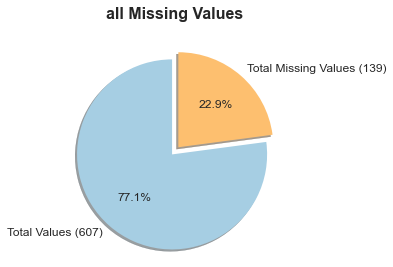

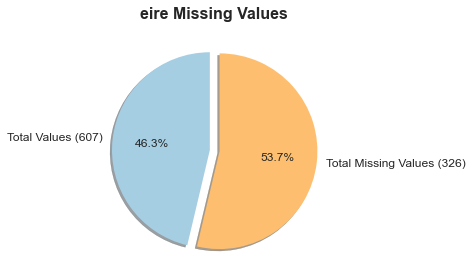

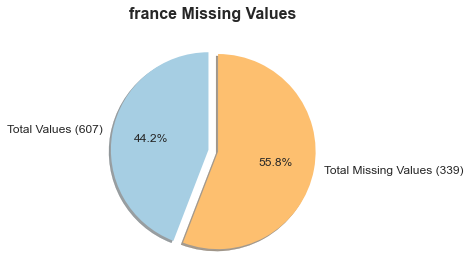

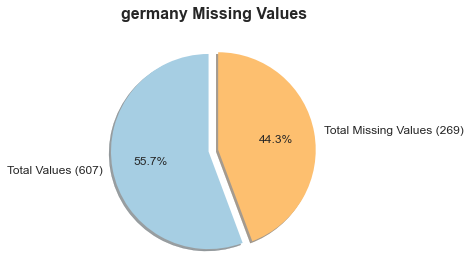

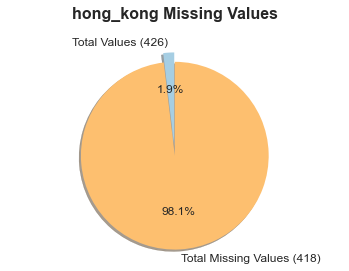

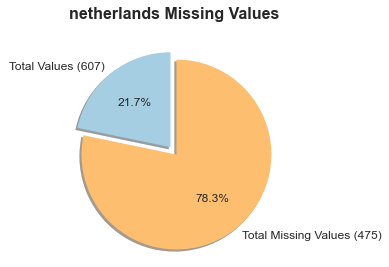

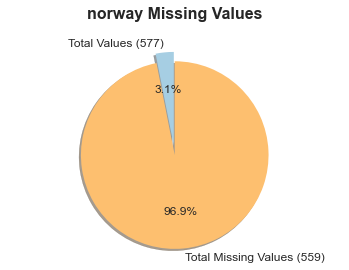

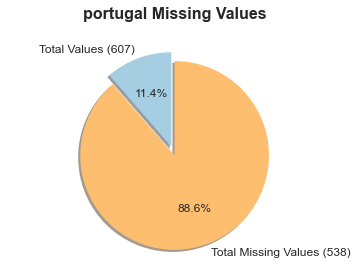

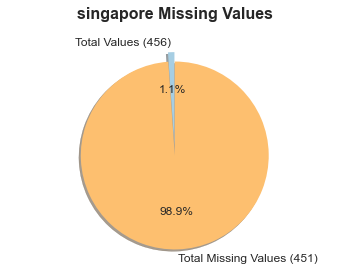

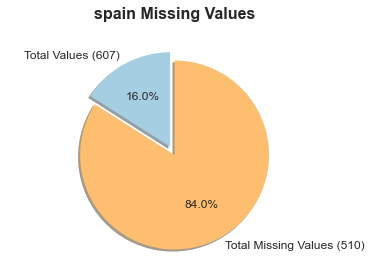

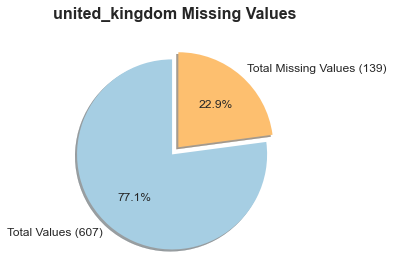

In [3]:
# Missing values summary
ts_work = copy.deepcopy(ts_all)
for key, df in ts_work.items():
    df.replace(0, np.nan, inplace=True)
    print(f"{key} Missing Value Summary:")
    print('-'*22)
    print(df.isna().sum(axis = 0),'\n')

    # Overall fractions calculation
    tot_val = df.shape[0]
    tot_val_nan = df[df['revenue'].isnull()].shape[0]

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = f'Total Values ({tot_val})', f'Total Missing Values ({tot_val_nan})'
    explode = (0, 0.1,)  # only "explode" the 2nd slice
    theme = plt.get_cmap('Paired')

    fig1, ax1 = plt.subplots()
    sizes = [(tot_val-tot_val_nan), tot_val_nan]

    ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(f"{key} Missing Values\n", fontsize=LARGE_SIZE, fontweight='bold')

    fig1.set_facecolor('xkcd:white')
    plt.savefig(f'export/pie_missing_val_{key}.png', dpi=200)

#### Pair Plot Visualization

d:\jk works\artificial_intelligence\kurzy_certifikaty\09_ibm_ai_enterprise_workflow\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\jk works\artificial_intelligence\kurzy_certifikaty\09_ibm_ai_enterprise_workflow\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\jk works\artificial_intelligence\kurzy_certifikaty\09_ibm_ai_enterprise_workflow\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\jk works\artificial_intelligence\kurzy_certifikaty\09_ibm_ai_enterprise_workflow\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\jk works\artificial_intelligence\kurzy_certifikaty\09_ibm

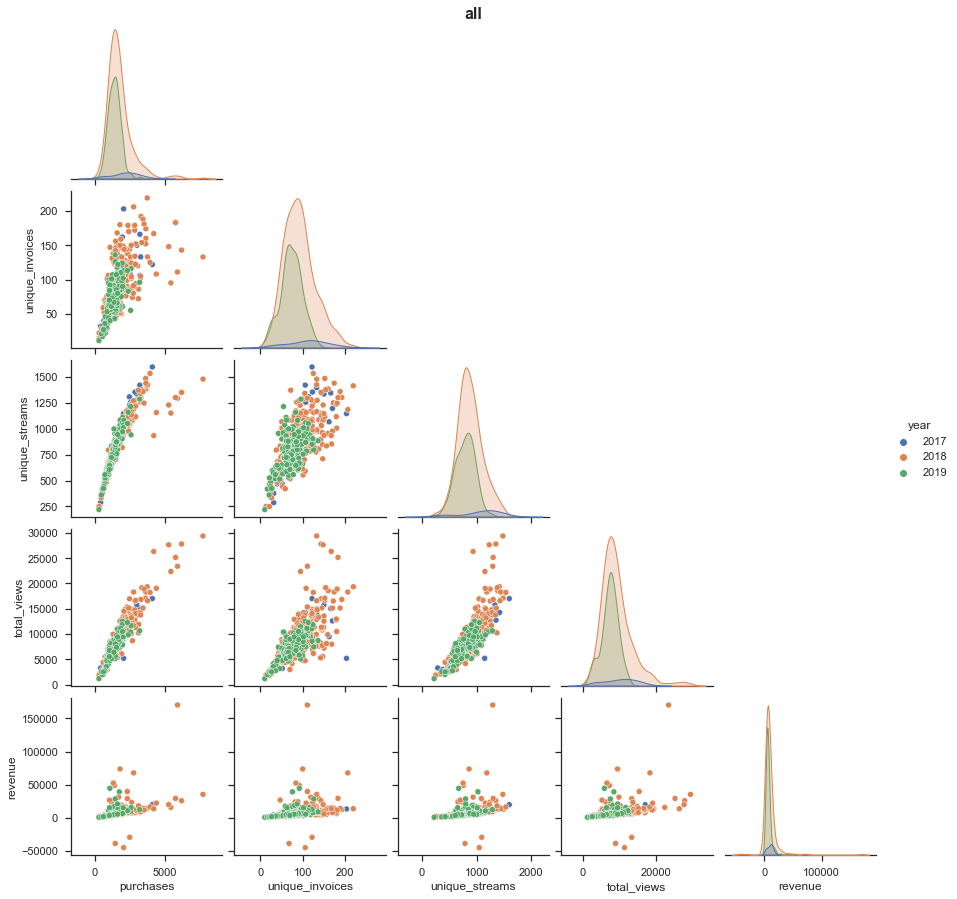

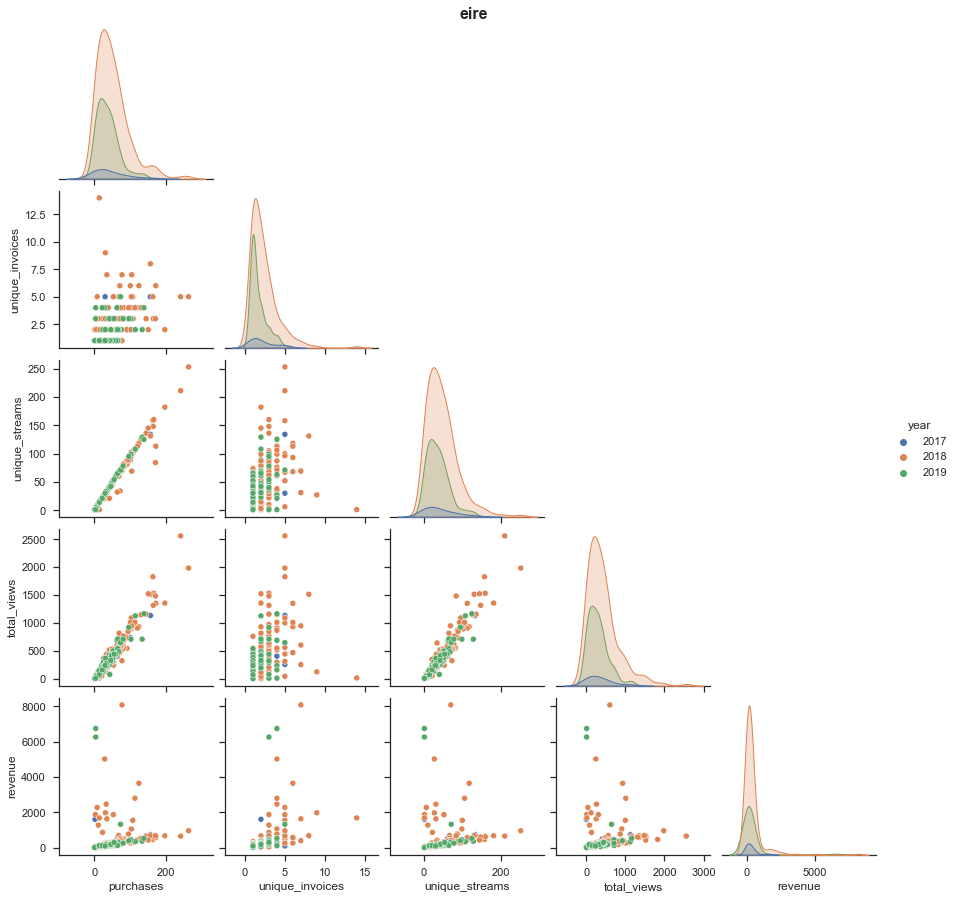

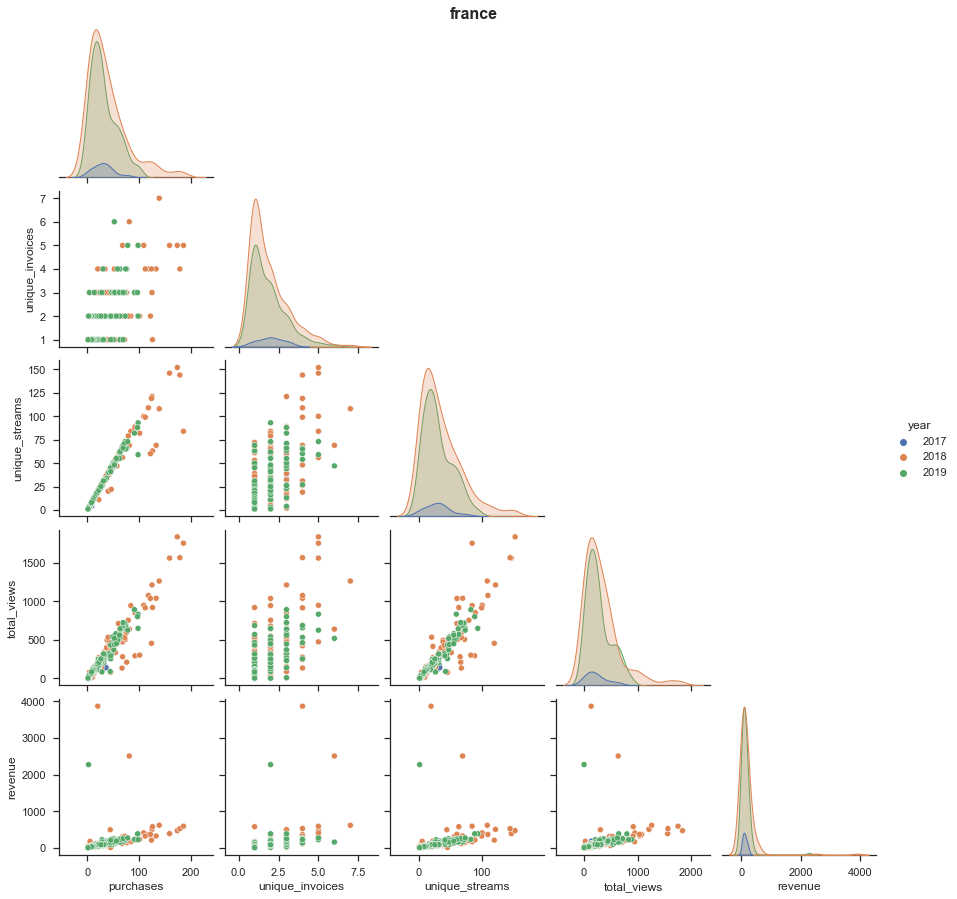

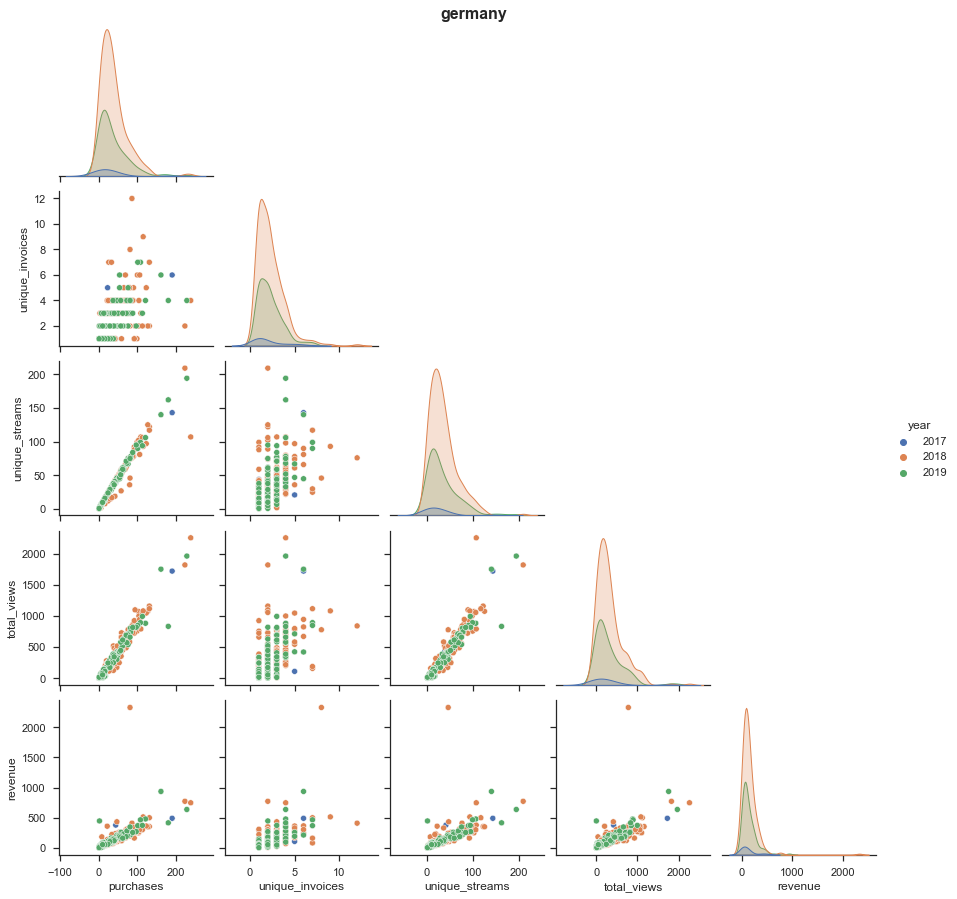

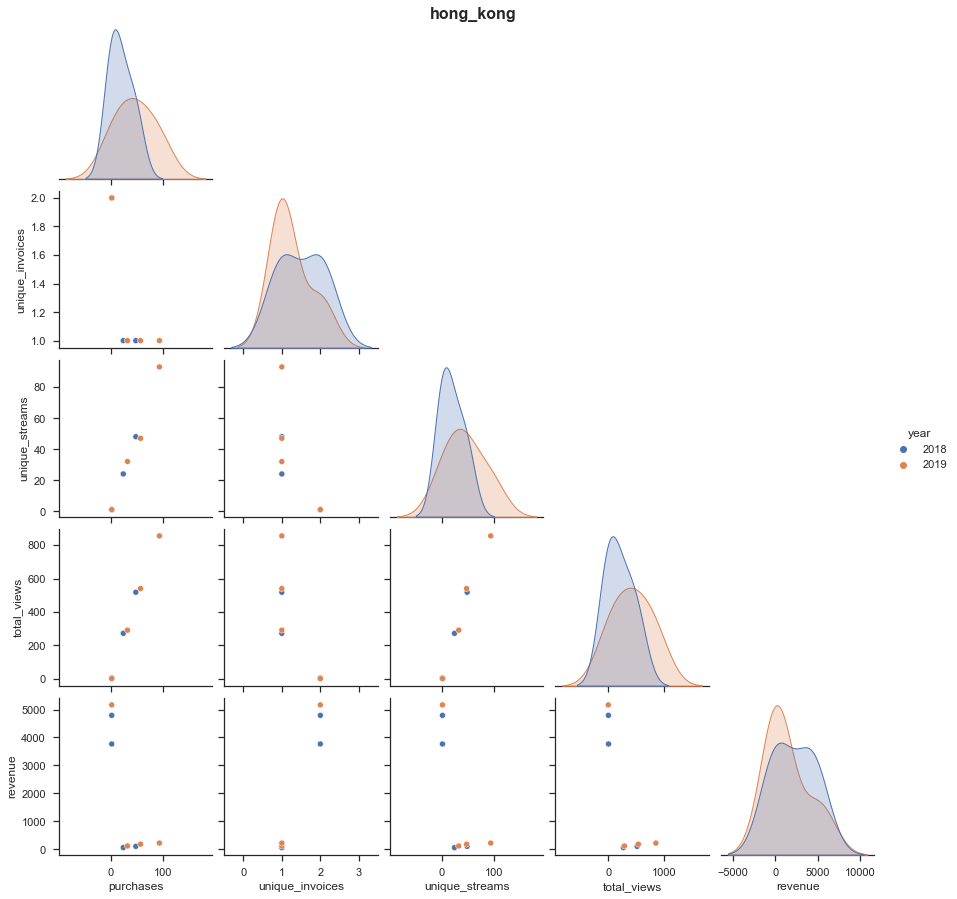

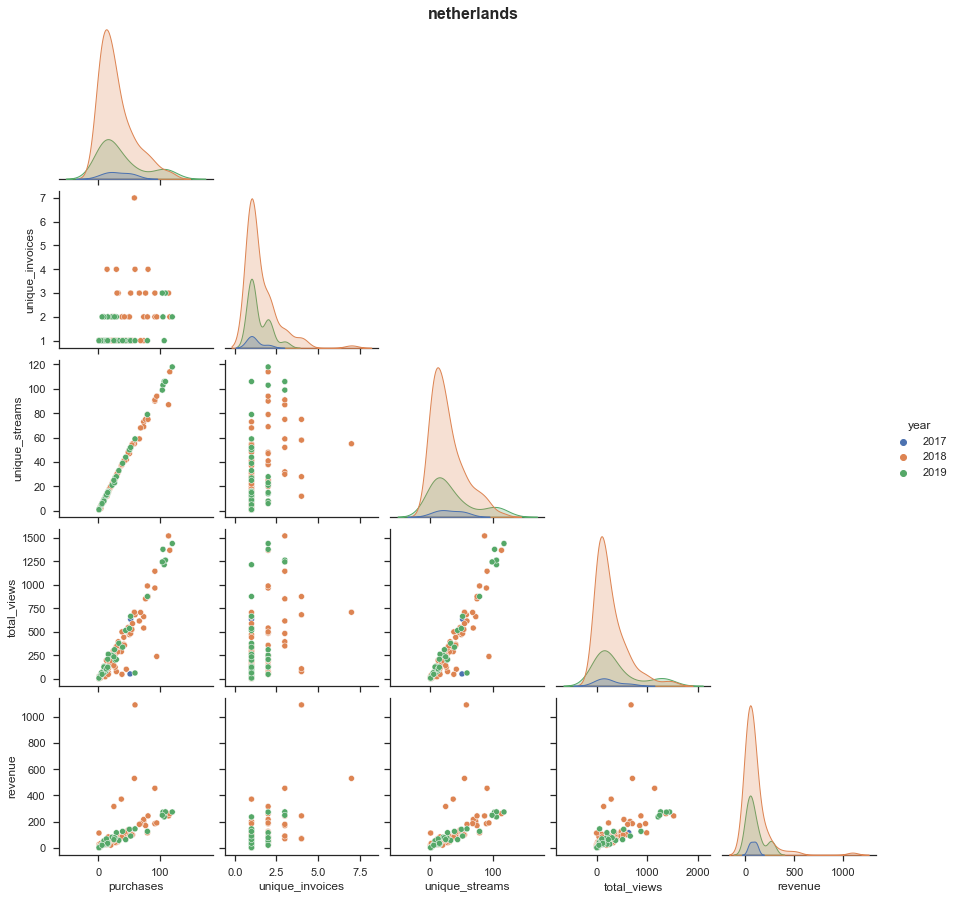

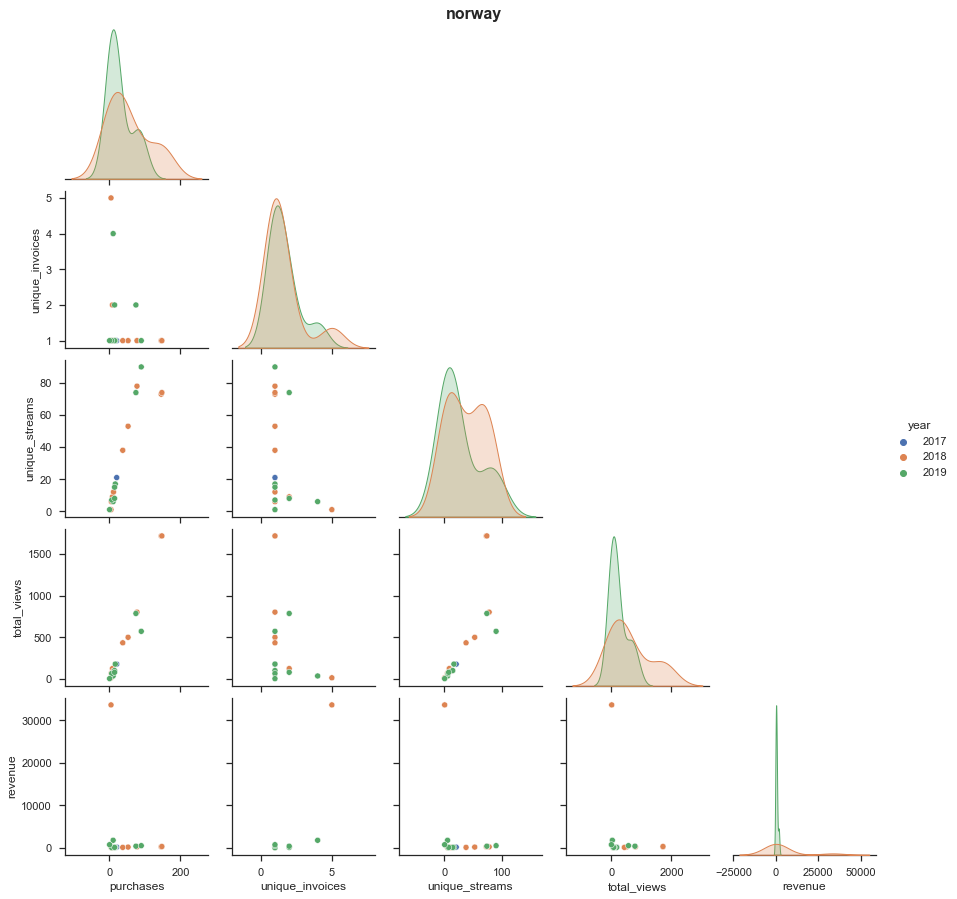

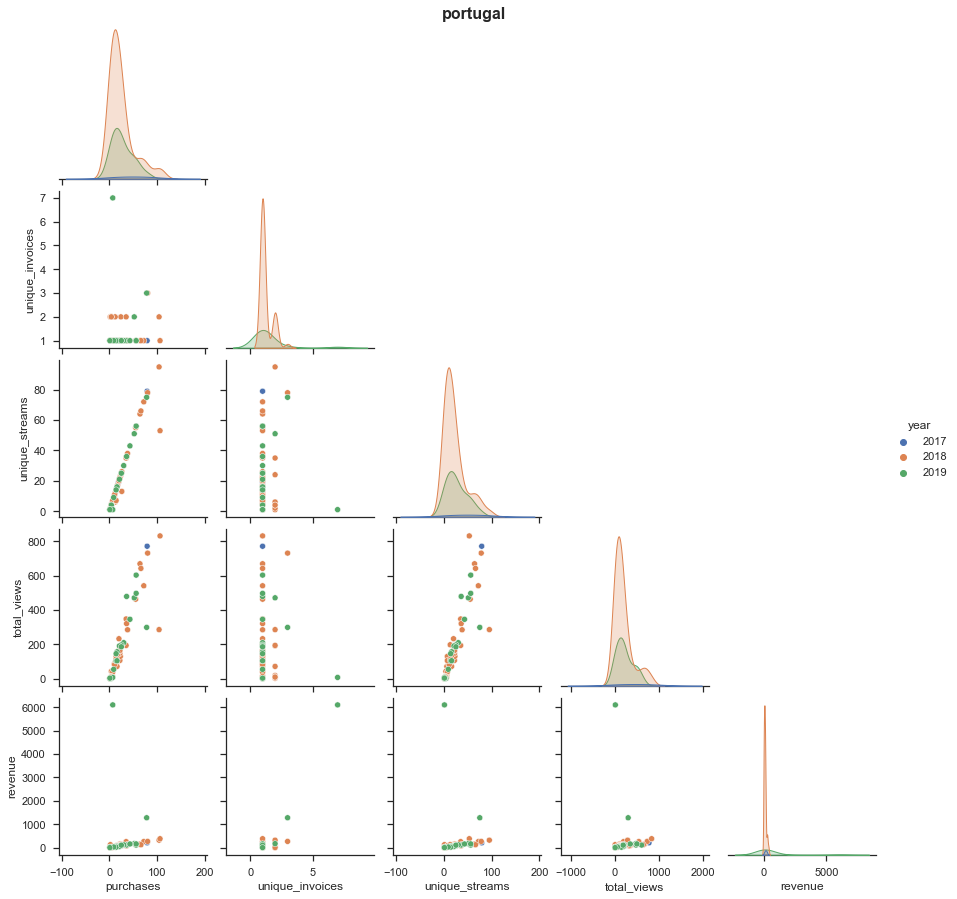

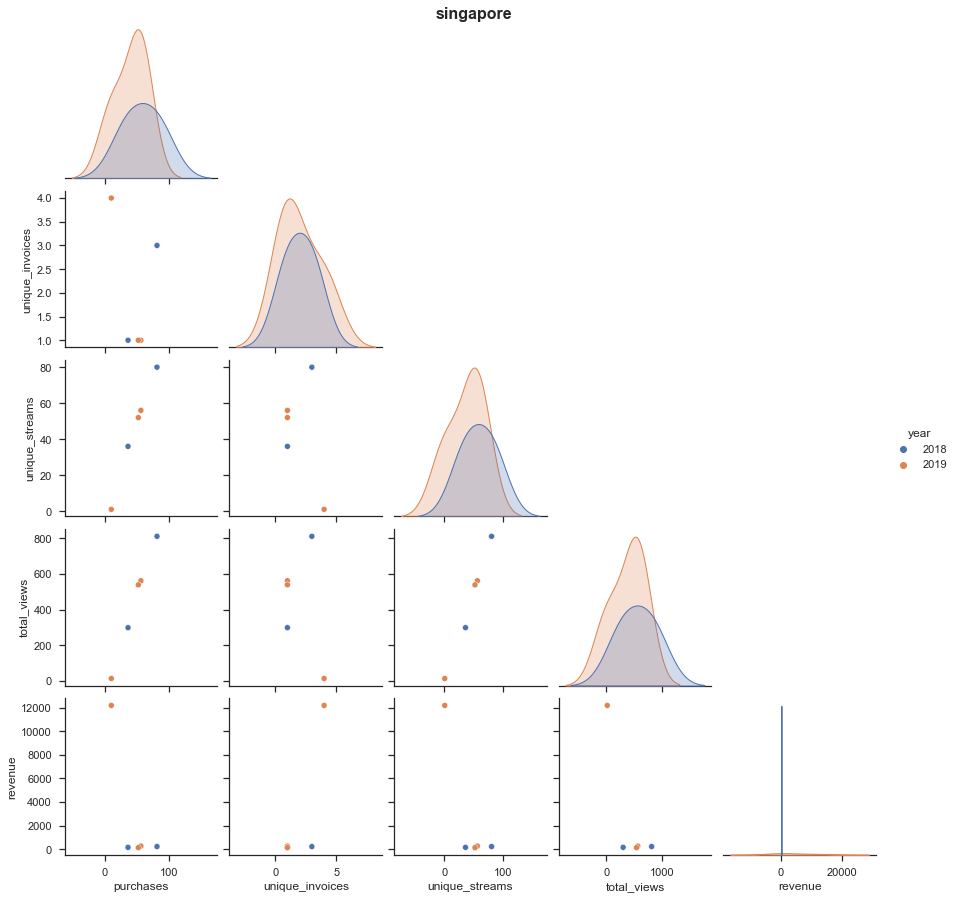

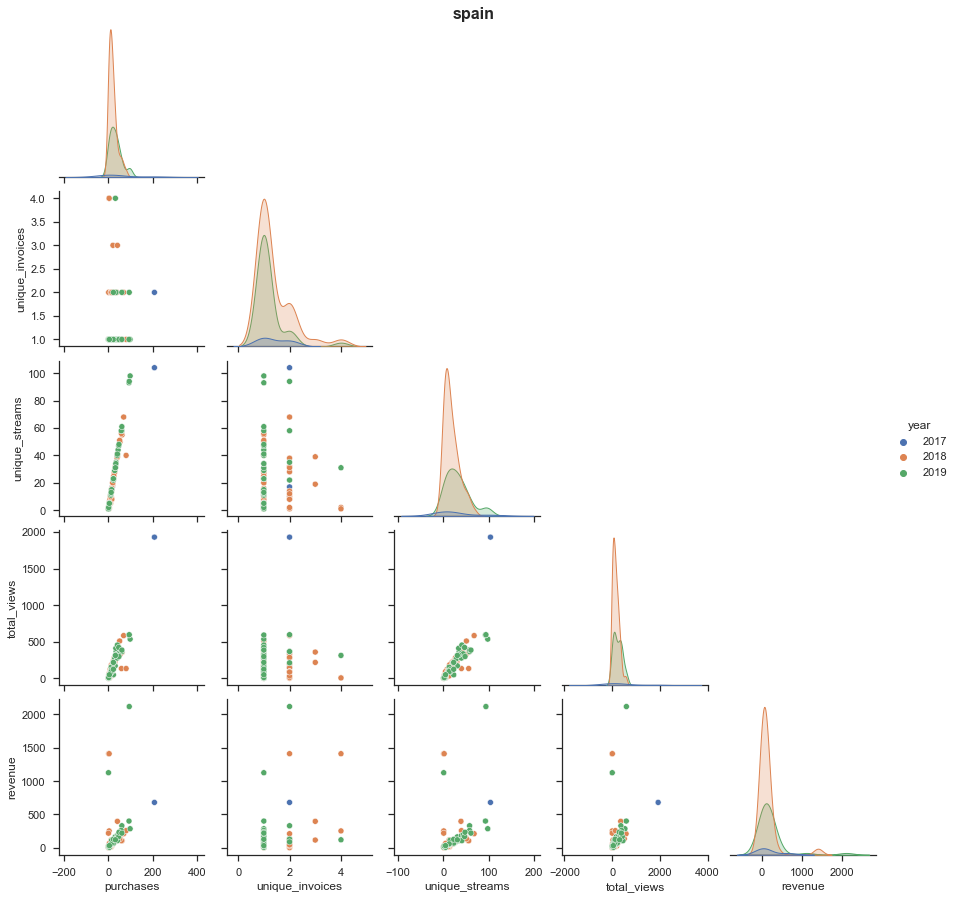

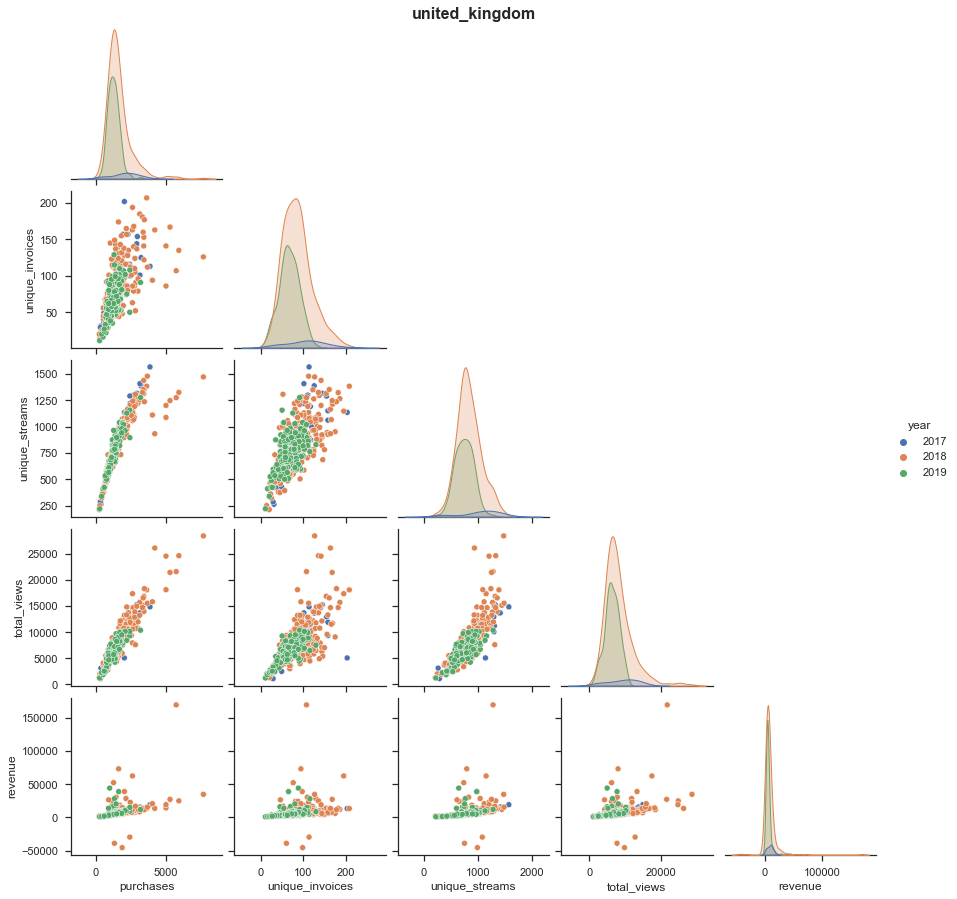

In [4]:
for key, df in ts_work.items():
    columns = ['purchases', 'unique_invoices', 'unique_streams', 'total_views', 'revenue' ]

    sns.set(style="ticks", color_codes=True)
    sns.pairplot(df,vars=columns, hue="year", dropna=True, corner=True)
    plt.suptitle(f'{key}', y=1, fontsize = LARGE_SIZE, fontweight='bold')
    plt.savefig(f'export/pair_plot_{key}.png', dpi=200)

#### Correlation Matrix Visualization

----- all Strong Positive Pairs -----
revenue          unique_streams     0.331129
total_views      revenue            0.399065
revenue          purchases          0.454676
purchases        unique_invoices    0.634036
unique_invoices  unique_streams     0.691142
                 total_views        0.718337
total_views      unique_streams     0.814562
unique_streams   purchases          0.863381
purchases        total_views        0.931435
                 purchases          1.000000
dtype: float64 

----- all Strong Negative Pairs -----
Series([], dtype: float64) 
 

----- eire Strong Positive Pairs -----
unique_streams   unique_invoices    0.418989
unique_invoices  total_views        0.441921
                 purchases          0.455005
                 revenue            0.466120
unique_streams   total_views        0.954755
purchases        total_views        0.970074
unique_streams   purchases          0.984630
purchases        purchases          1.000000
dtype: float64 

----- eire

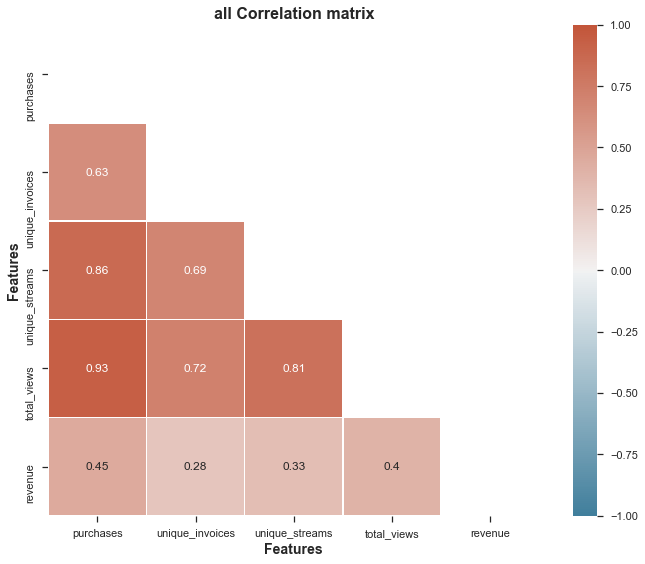

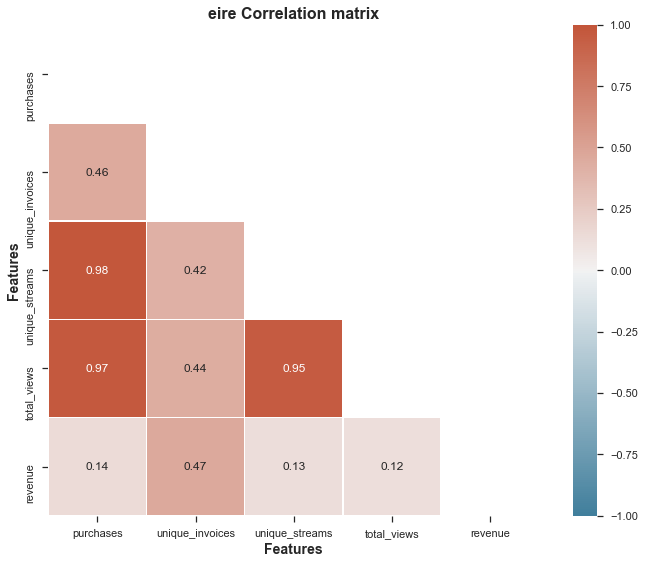

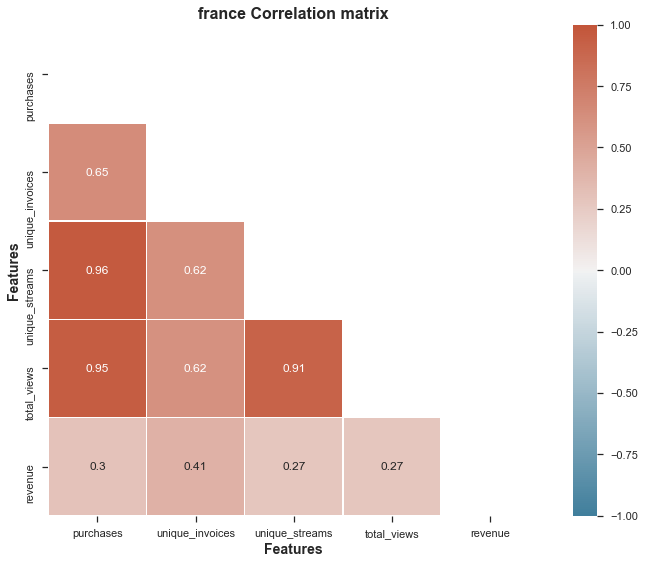

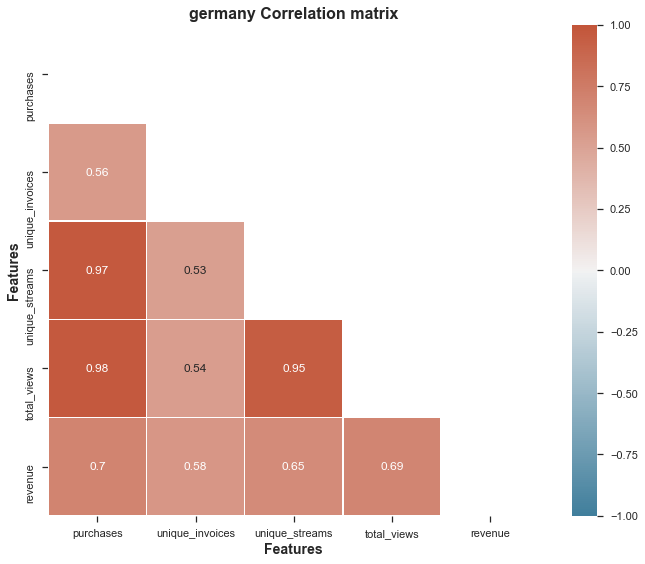

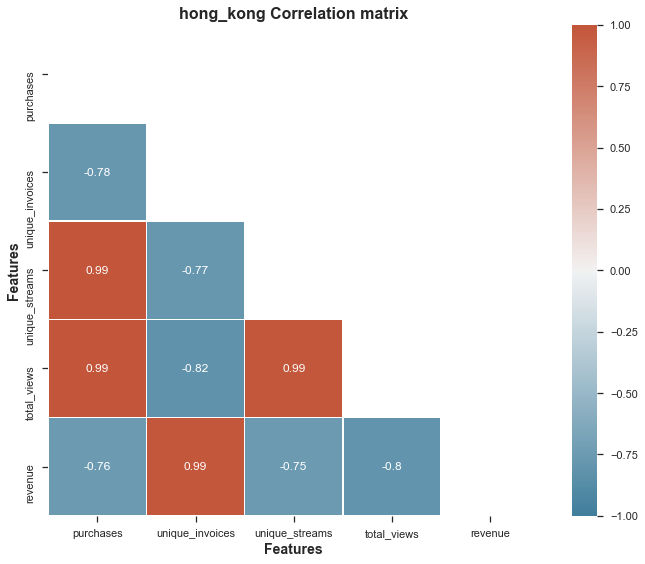

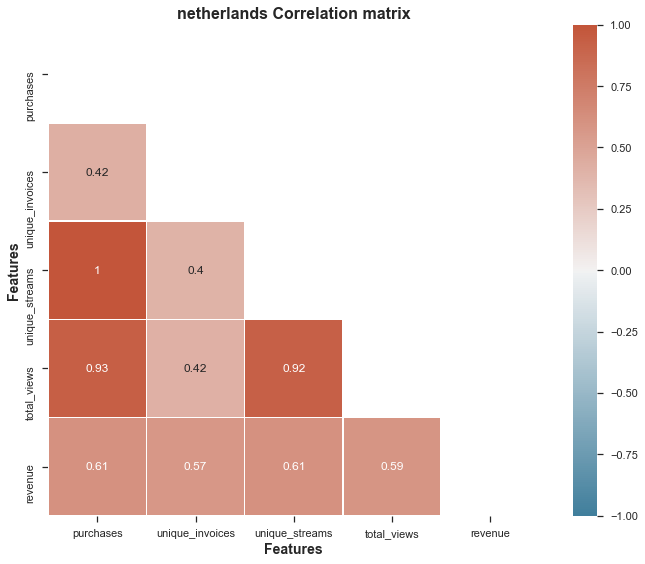

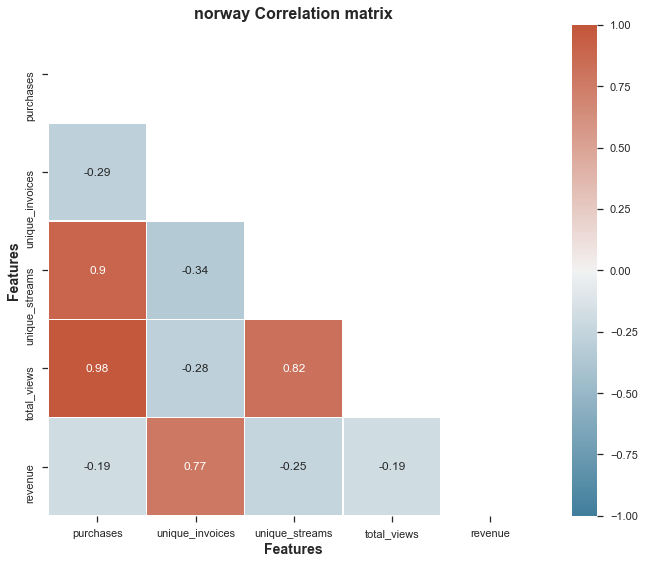

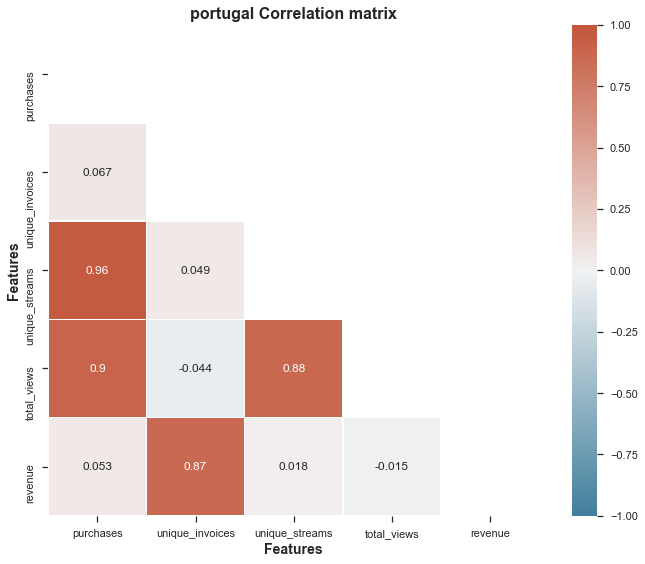

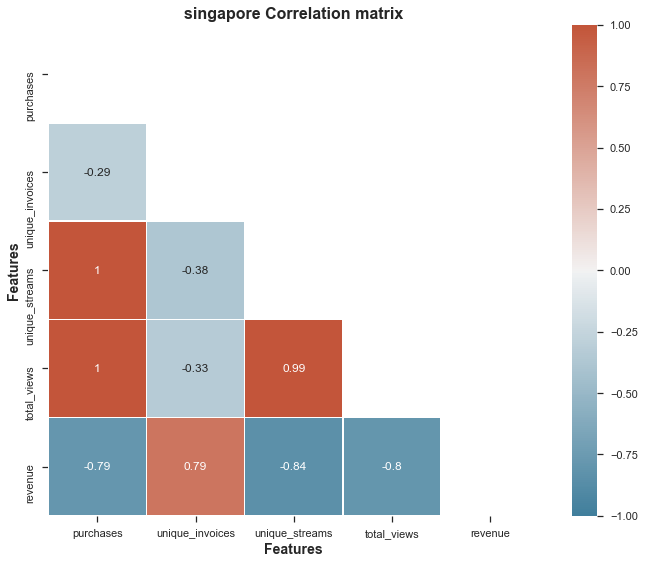

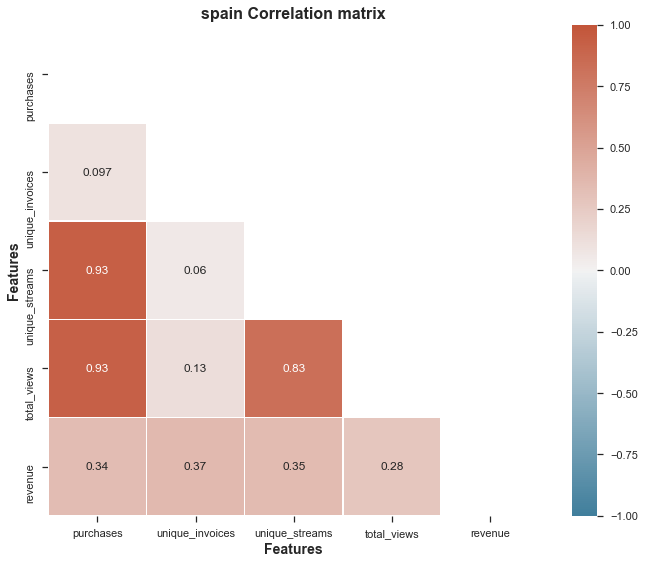

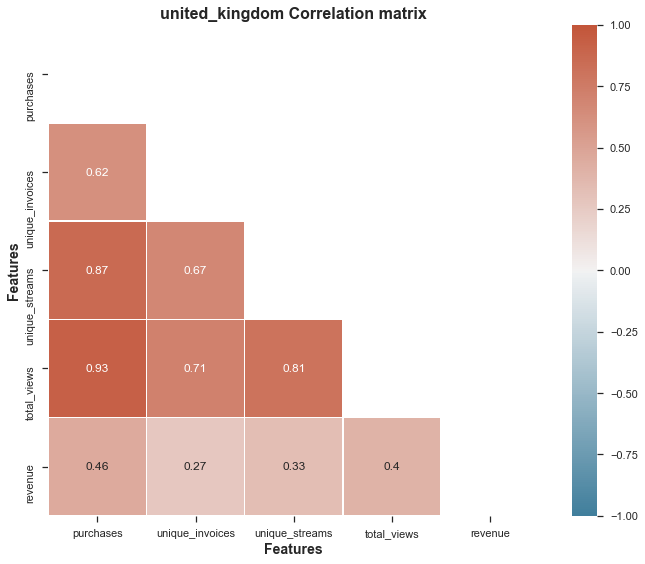

In [5]:
for key, df in ts_work.items():
    # Clean and prepare df for correlation matrix plot
    df_cat = df.copy(deep=True)
    df_cat = df_cat.dropna()

    df_cat = df_cat.drop(columns=['date', 'year_month', 'year'])
    # df_cat = pd.get_dummies(df_cat)

    # Compute the correlation matrix
    corr = df_cat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Plot the matrix
    sns.heatmap(corr, mask=mask, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap=cmap)
    plt.title(f"{key} Correlation matrix", fontsize=LARGE_SIZE, fontweight='bold')
    plt.xlabel("Features", fontweight='bold', fontsize=MEDIUM_SIZE,)
    plt.ylabel("Features", fontweight='bold', fontsize=MEDIUM_SIZE,)
    plt.tight_layout()
    plt.savefig(f'export/corr_matrix_{key}.png', dpi=200)

    # Pair sorting
    corr_pairs = corr.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort")
    sorted_pairs.drop_duplicates(inplace=True)

    print(f'----- {key} Strong Positive Pairs -----')
    strong_positive_pairs = sorted_pairs[sorted_pairs > 0.3]
    strong_positive_pairs.drop_duplicates(inplace=True)
    print(strong_positive_pairs,'\n')

    print(f'----- {key} Strong Negative Pairs -----')
    strong_negative_pairs = sorted_pairs[sorted_pairs < -0.3]
    strong_negative_pairs.drop_duplicates(inplace=True)
    print(strong_negative_pairs,'\n \n')

#### Features Visualization Over Countries

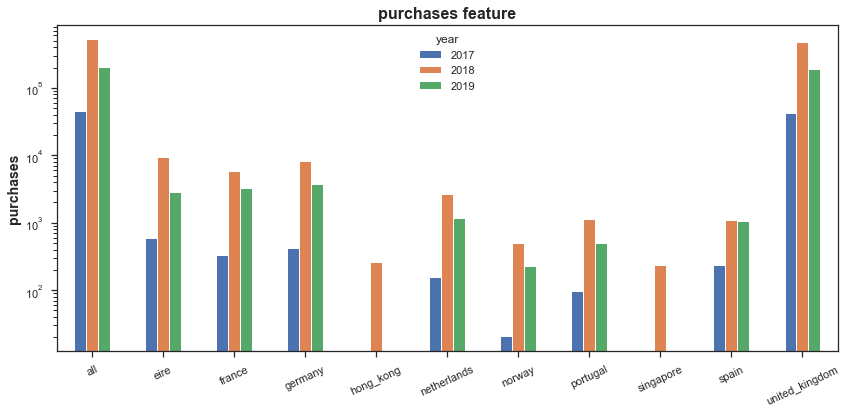

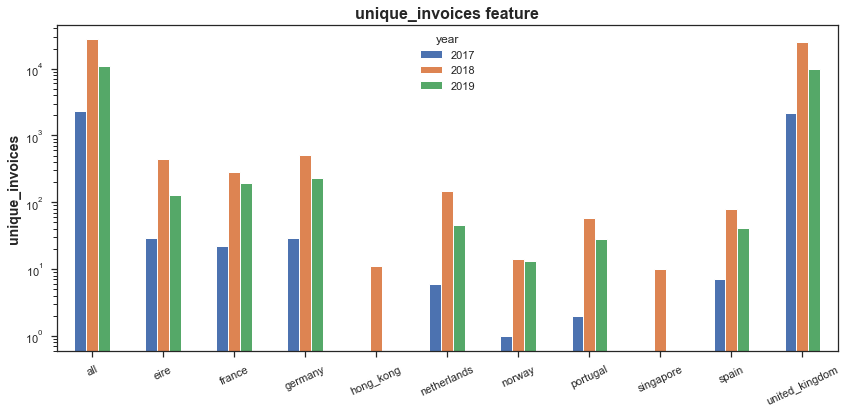

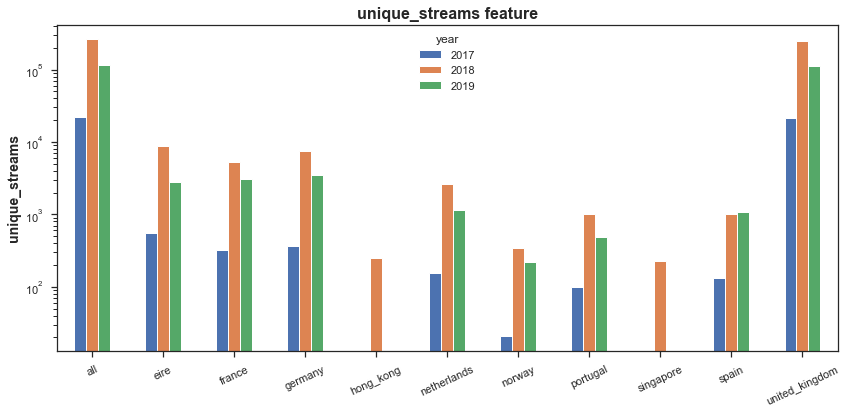

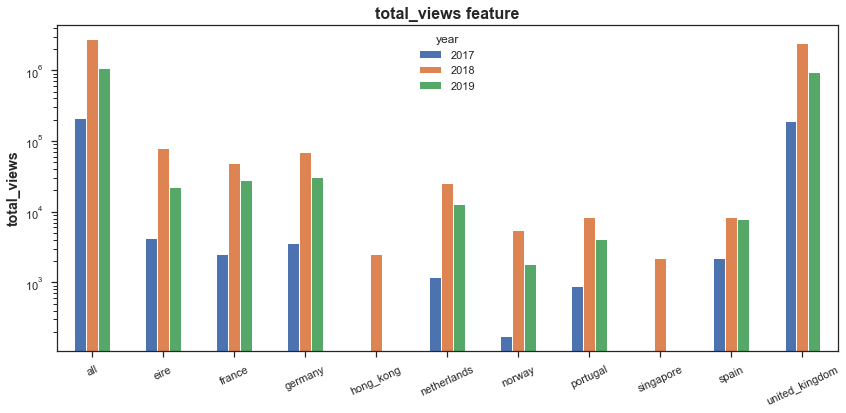

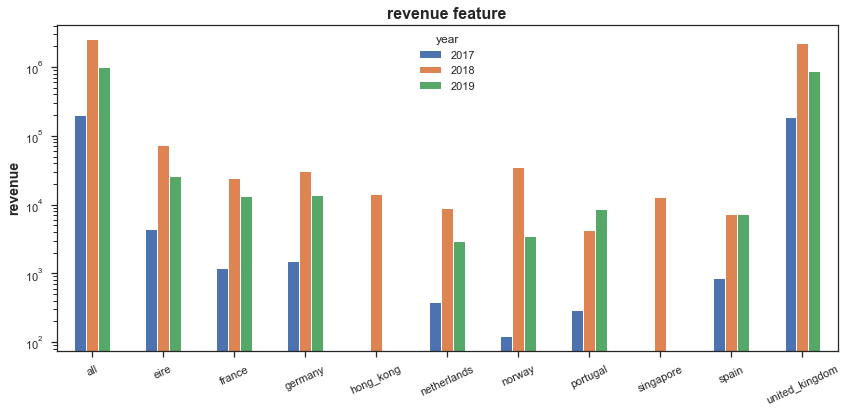

In [6]:
for column in columns:
    features = []
    year = []
    for key, df in ts_work.items():
        df.dropna(inplace=True)
        features.append(df[column])
        year.append(df['year'])

    # Prepare df and clean
    df_tmp = pd.DataFrame(features)
    df_tmp = df_tmp.transpose()
    df_tmp.replace(np.nan, 0, inplace=True)
    df_tmp.columns = ts_work.keys()

    df_year = pd.DataFrame(year)
    df_year = df_year.transpose()
    df_year.columns = ts_work.keys()

    # Year sorting
    df_year['counts_tmp'] = df_year.count(axis=1)
    df_year.replace(np.nan, 0, inplace=True)
    df_year = df_year.astype('int')
    df_year['year_tmp'] = (df_year.sum(axis=1) - df_year['counts_tmp']) / df_year['counts_tmp']
    df_year['year'] = df_year['year_tmp'].astype('int')
    df_year['year'] = df_year['year'].astype('str')

    # Df finalize and pivot table creation
    df_merge = pd.concat([df_tmp, df_year[['year']]], axis=1)

    pivot = pd.pivot_table(df_merge, index = ['year'], values=ts_work.keys(), aggfunc='sum').round(0)
    pivot_T = pivot.transpose()

    # Pivot plotting
    pivot_T.plot.bar(figsize=(14,6))
    plt.xticks(rotation=25)
    plt.ylabel(column, fontweight='bold', fontsize=MEDIUM_SIZE,)
    plt.yscale('log')
    plt.title(f'{column} feature', fontweight='bold', fontsize=LARGE_SIZE)
    plt.savefig(f'export/pivot_{column}.png', dpi=200)


#### Time-series plotting

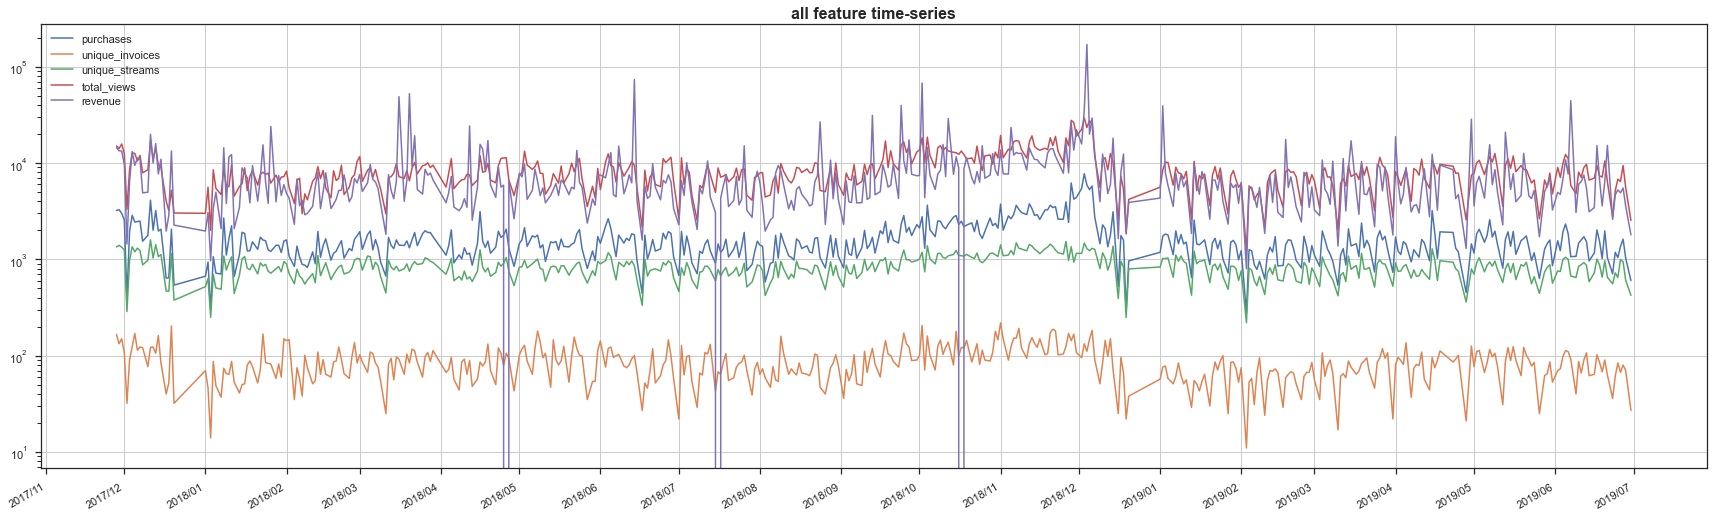

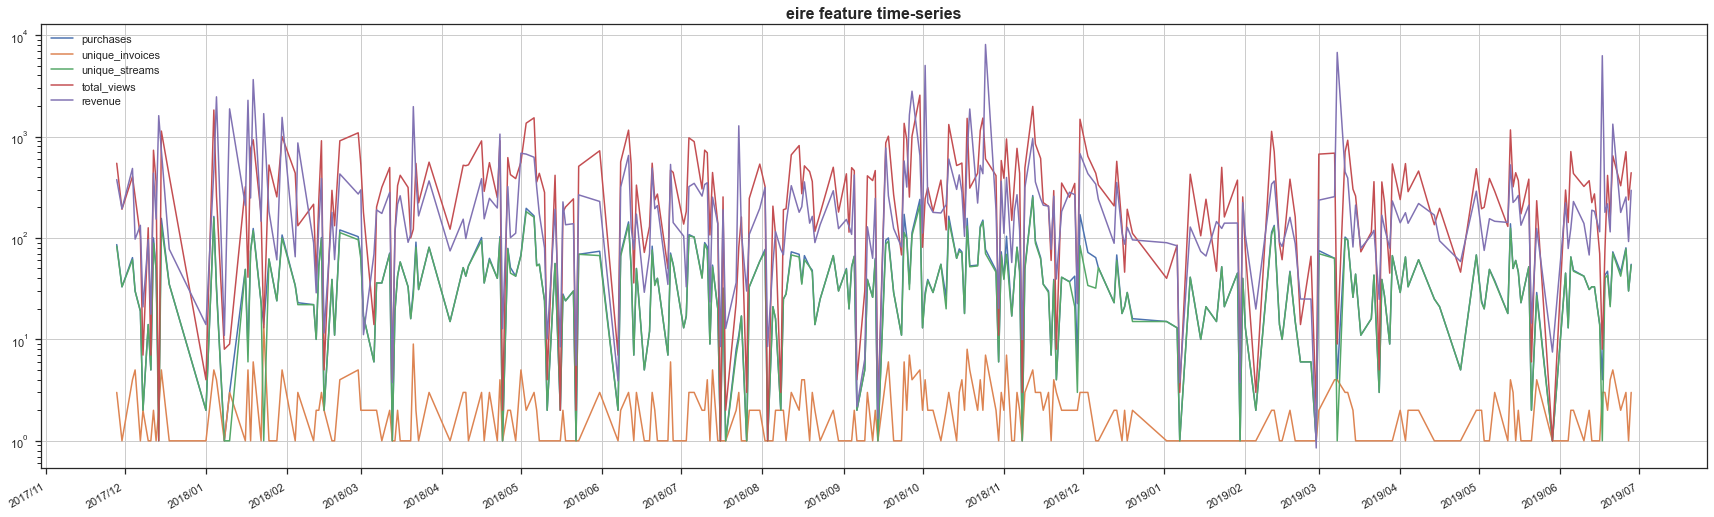

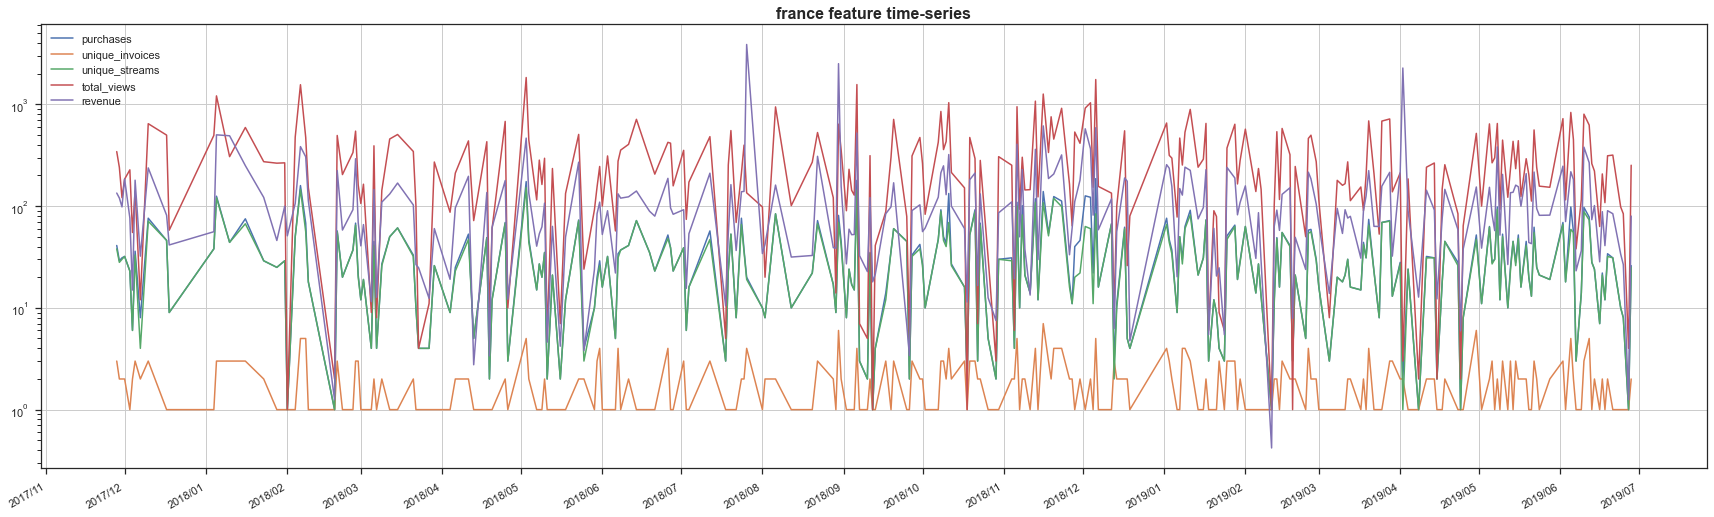

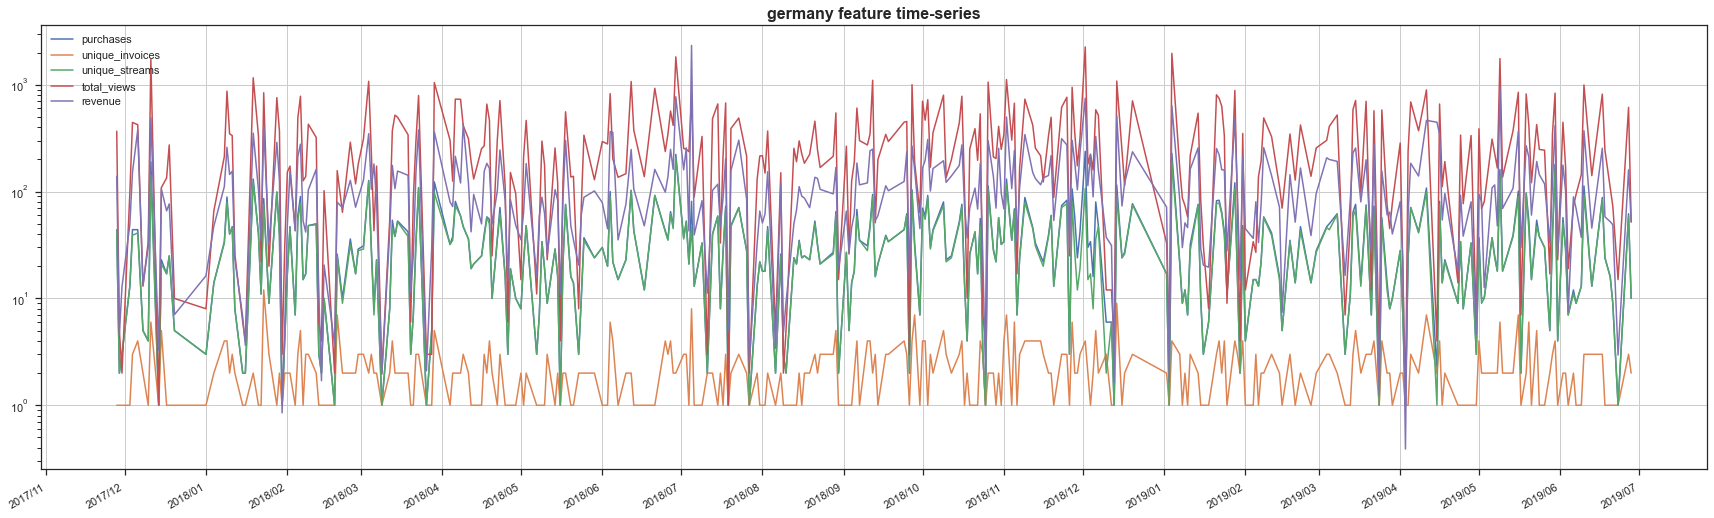

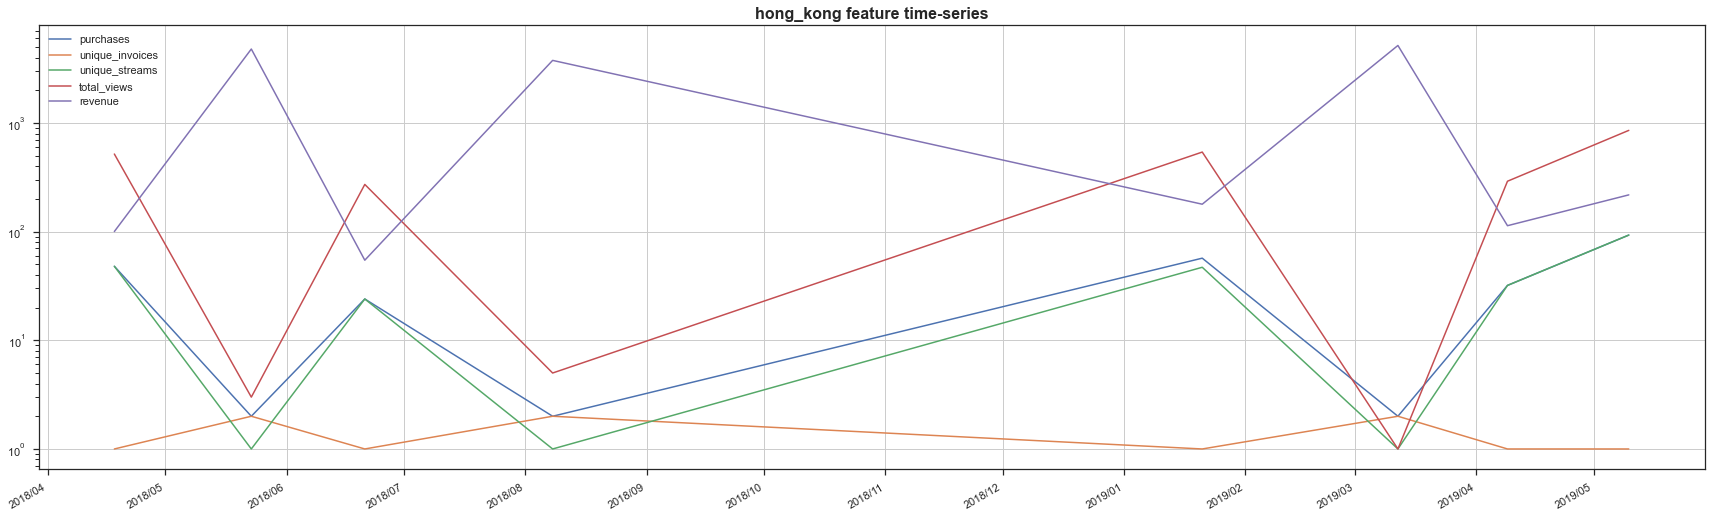

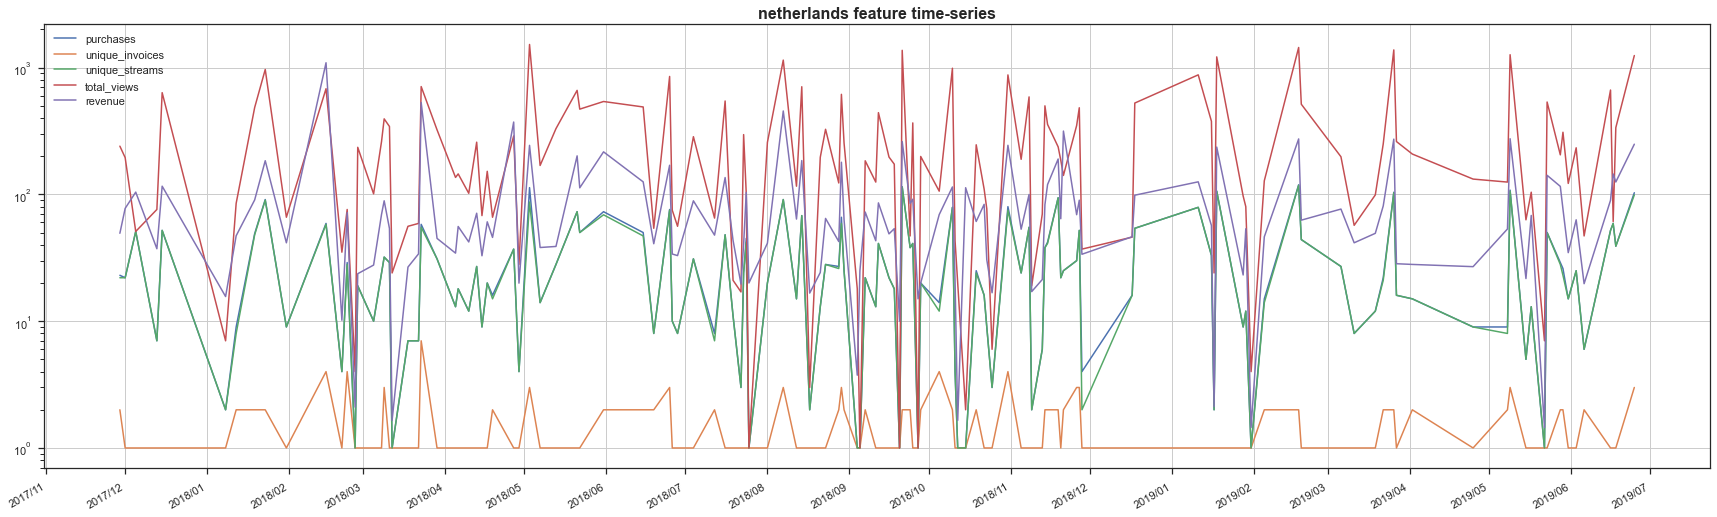

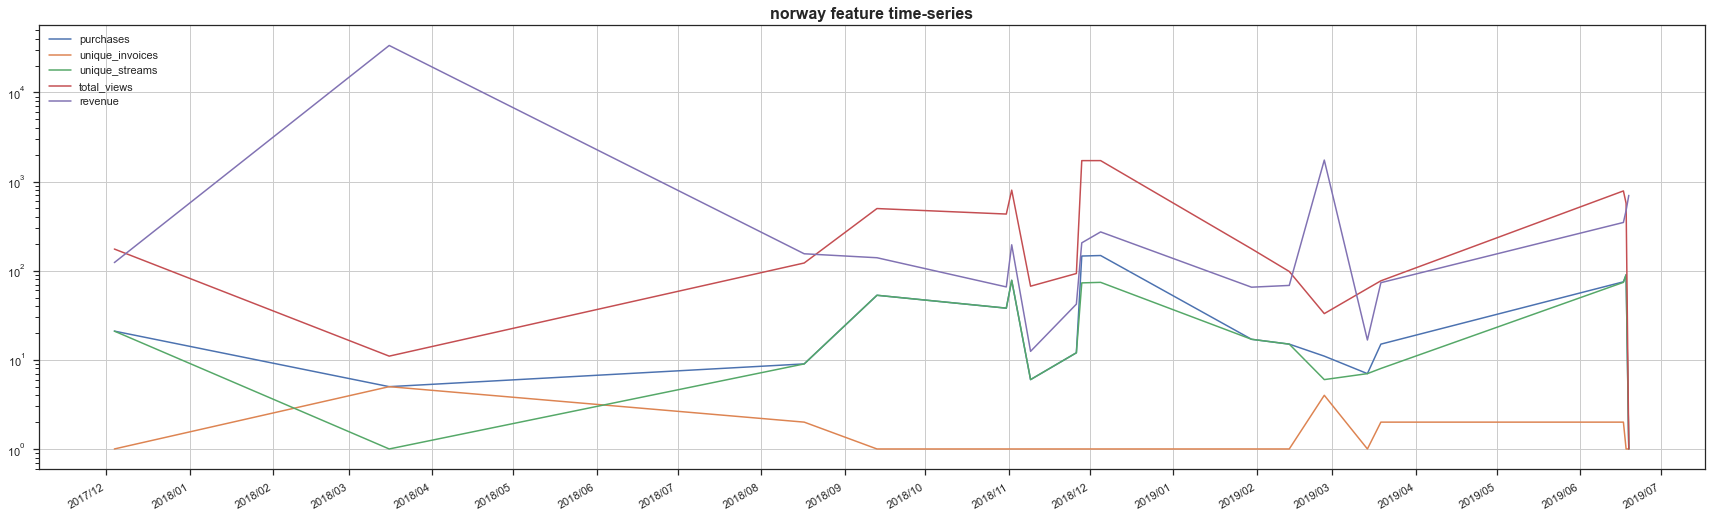

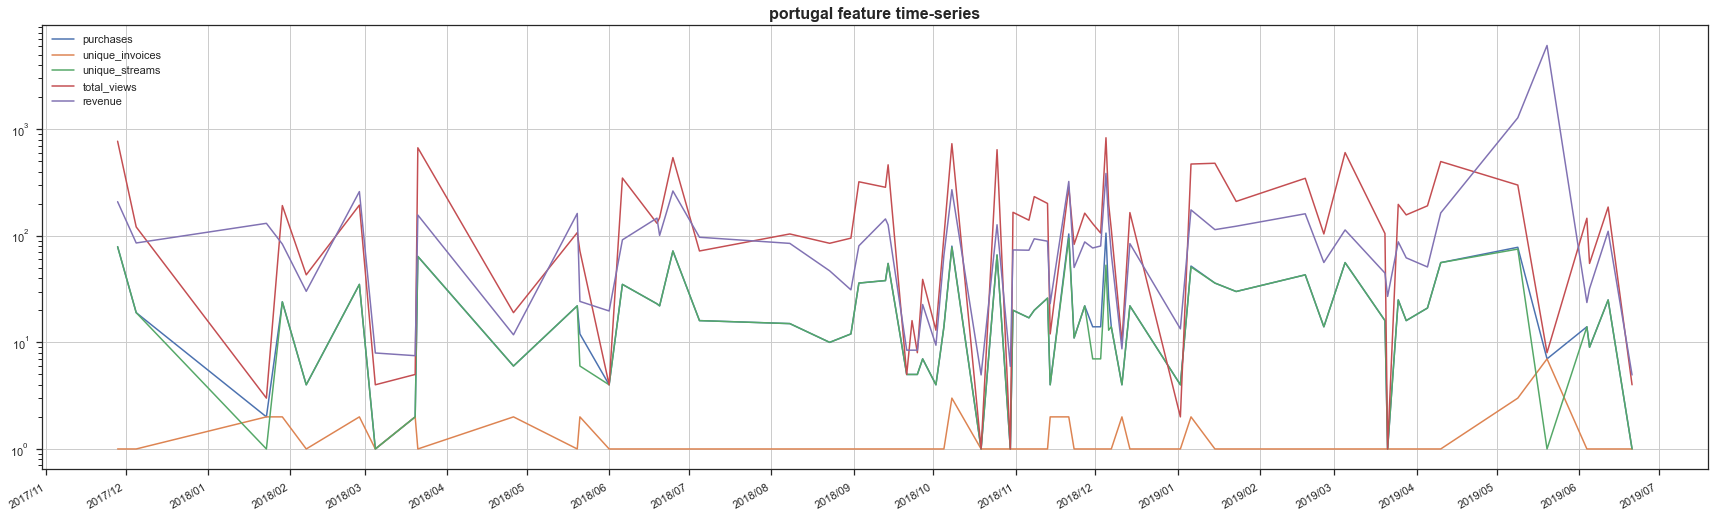

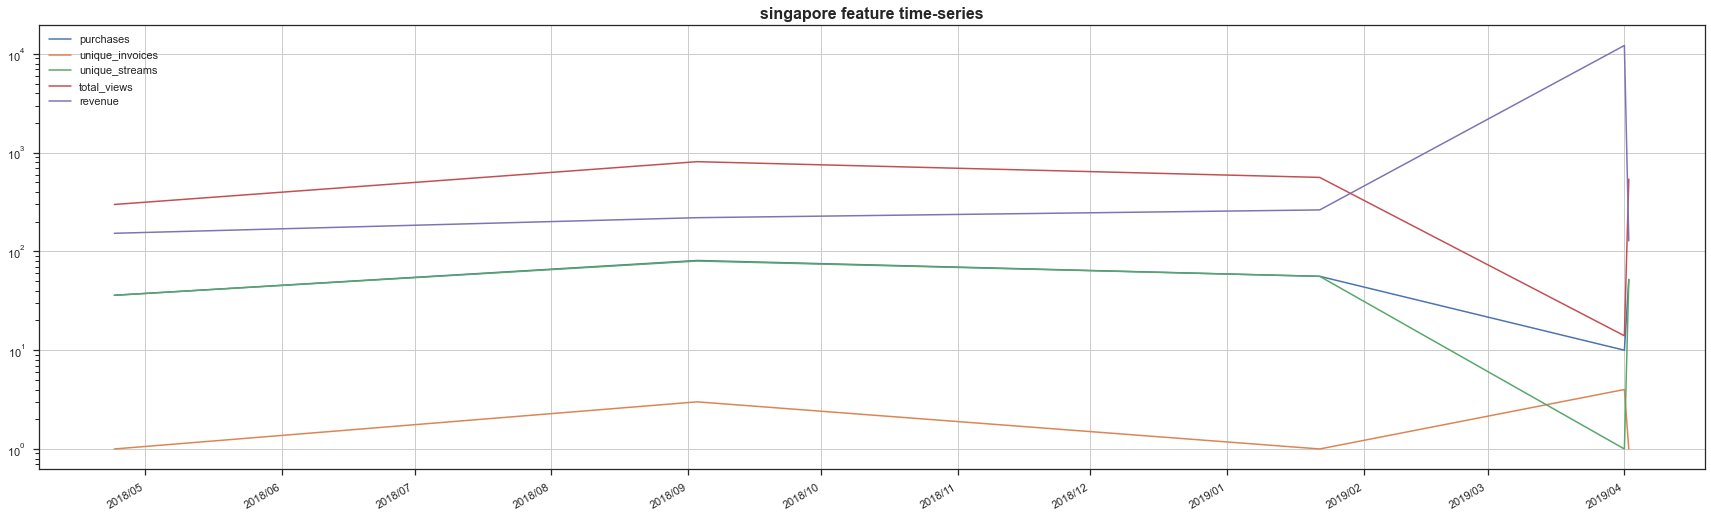

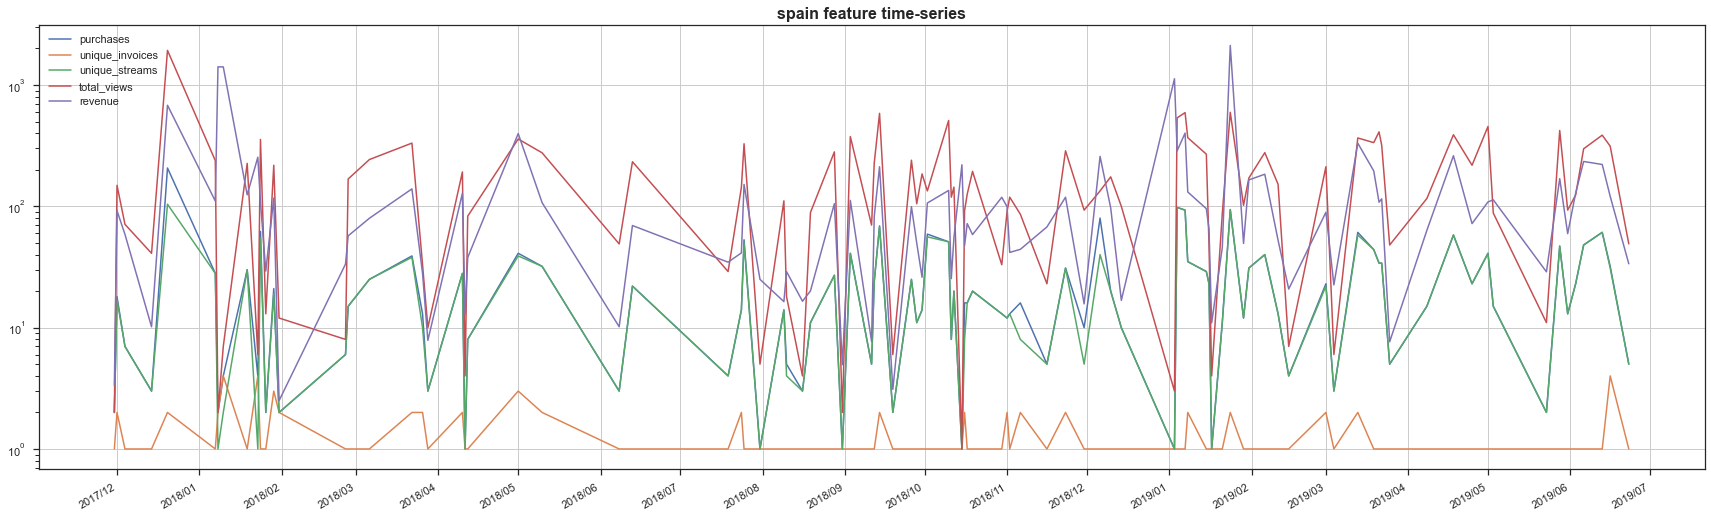

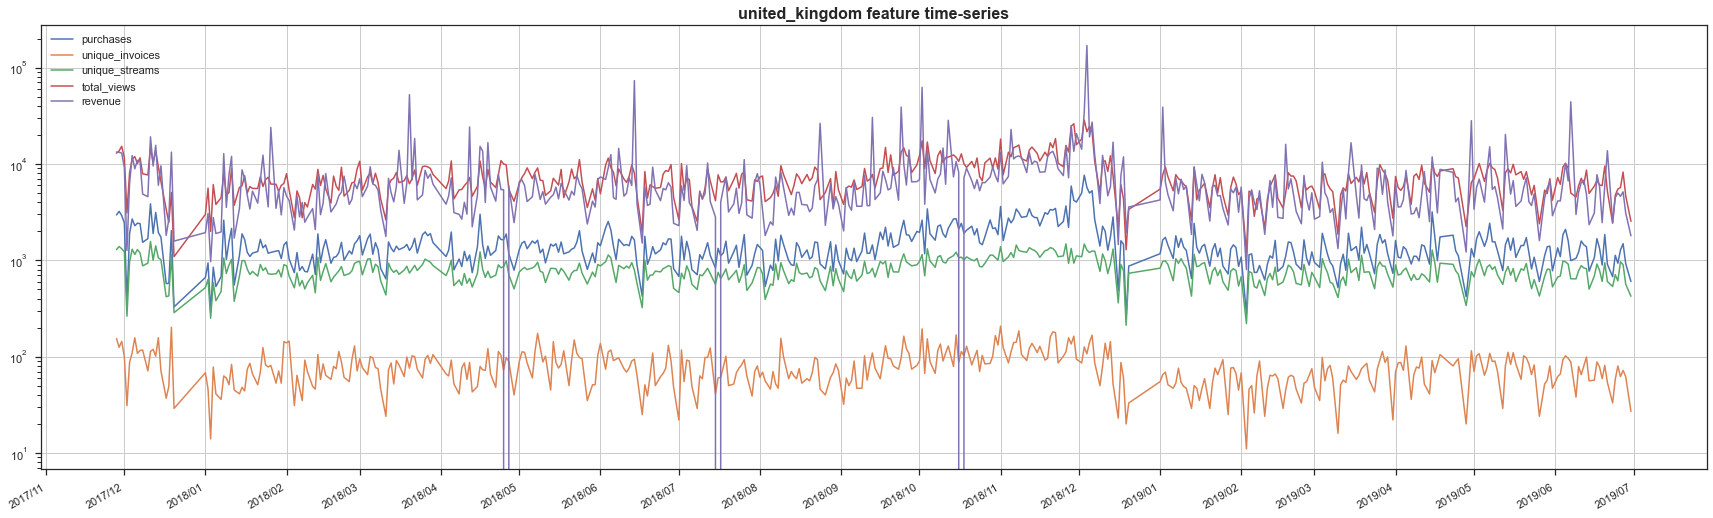

In [7]:
for key, df in ts_work.items():
    # Clean and prepare df for correlation matrix plot
    df_tmp = df.copy(deep=True)
    df_tmp = df_tmp.dropna()

    df_tmp = df_tmp.drop(columns=['year_month', 'year'])

    # Convert date column to datetime format
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()  # every month
    fmt = mdates.DateFormatter('%Y/%m')

    fig, ax = plt.subplots(figsize=(24,8))
    fig.tight_layout()
    for label in columns:
        ax.plot(df_tmp['date'], df_tmp[label], label=label)
    # ax.plot(df_tmp['date'], df_tmp['revenue'], label='re')
    # ax.set_ylabel(column, fontweight='bold', fontsize=MEDIUM_SIZE,)
    ax.set_title(f'{key} feature time-series', fontweight='bold', fontsize=LARGE_SIZE,)
    ax.grid(True)
    ax.legend(loc='upper left')
    plt.yscale('log')

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()

    plt.savefig(f'export/time-series_{key}.png', dpi=200)

> (5.) Articulate your findings using a deliverable with visualizations.

### Summary:
#### Missing Data:
* Overall is missing 22.9% values in dataset from total of 607. When consider segmentation for separate country markets, It can be divided into three categories based on amount of missing data. Into **first category** falls only UK market where is missing 22.9% of the values. **Second category** is consist of markets where missing data are in range from 44 to 56%. Those countries are Eire, France and Germany. The rest of the countries (Hong Kong, Netherlands, Norway, Portugal, Singapore, Spain) falls into **third category** where missing values ranges from 78 to 99%.
* Based on fact that significant proportion of data is not available for the most of the markets, It was decided to drop missing columns and not to use any imputation technique to not impact data bias in larger scale.

#### Features and Business Metric Correlation
* There has been created pair plots and feature correlation matrices overall and for particular markets. From perspective of gathered data of all markets, there is only positive and quite strong correlation between features. The strongest correlation (0.93) is observed between feature ***purchases*** and ***total_views*** followed by ***purchases*** and ***unique_streams*** at 0.86. Our business metric (***revenue***) correlates the most to ***purchases*** at 0.45 and ***total_views*** at 0.4. Based on that can be assumed that focus on globally leveraging ***total_views*** and ***purchases*** might have positive impact on overall revenue.
* Similar behavior can be observed on the markets which falls into **first** and **second category** missing of data. Additionally, it can be observed also strong correlation between ***revenue*** and ***unique_invoices***.
* In case of countries like Hong Kong, Singapore, Norway and Portugal is possible to see significant negative or no correlation between most of the features. All of them falls into **category three** where the most of the data missing. Although this can point for local market specifics, it's necessary to take into account that noticeable lack of data can create significant  bias. Therefore, no conclusion is provided for this category at the moment.

#### Features Visualization Over Countries
* When total sum of each feature is compared over the years 2018 and 2019, it is possible to notice stagnating trend. It is necessary to take into account that data for year 2019 are available only up to 07/2019, and so they cannot be compared with the year 2018 in full extent. However, it's possible to state that global ***revenue*** for the year 2019 at approx. 60% timeframe of the whole year reach only 39,5% of ***revenue*** generated during the year 2018. This can be seen as a decreasing trend but that's not exactly true when the time-series characteristic of the revenue is taken into account. On that, there is possible to see from 09/2018 to 12/2018 there was noticeable rise in sales on overall revenue. If we compare the same periods for both years (01/2018-07/2018 and 01/2019-07/2019) it can be seen that revenue trend doesn't change.
* The trend discussed above is more or less visible in the case of countries which falls into **first** and **second category** with similar proportions in revenue generation. Exception is visible on Portugal and Spain market where ***revenue*** for 2019 already exceeds those from 2018. This can be explained by proportionally significant lack of data up to 09/2018 which causes tracking lower amount of revenue. (see relevant time-series plots)
* For Hong Kong and Singapore counties there is no conclusion provided at the moment due to lack of data.

### Conclusion & Recommendations
To use data in supervised modeling pipeline, it is vital to take into account significant lack od data for particular markets. Prediction performance can be negatively impacted and biased for those markets where majority of data is missing. On the other hand, there were already detected features (***purchases***, ***total_views***, ***unique_streams*** and ***unique_invoices***) on "data-rich" markets which can have positive impact to generating revenue if proper strategy for their stimulation is implemented. Such a strategy can be formulated with help of prediction tool which can be trained on data from "data-rich" countries. Subsequently, this strategy (with relevant modifications) can be also applied to markets where data is lacking at the moment.


